In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Heart attack data.xlsx')

In [126]:
df.head(5)

,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,0.0
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,1.0
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,0.0
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,1.0
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,0.0


In [127]:
df.dtypes

,0
Age,float64
Gender,float64
Heart Rate,float64
Pressure High,float64
Pressure Low,float64
Glucose,float64
KCM,float64
Troponin,float64
Output,float64


In [128]:
df.shape

(1323, 9)

In [129]:
df.count()

,0
Age,1321
Gender,1321
Heart Rate,1321
Pressure High,1321
Pressure Low,1321
Glucose,1321
KCM,1321
Troponin,1321
Output,1321


In [130]:
print(df.isnull().sum())

Age              2
Gender           2
Heart Rate       2
Pressure High    2
Pressure Low     2
Glucose          2
KCM              2
Troponin         2
Output           2
dtype: int64


In [131]:
df = df.dropna()
df.shape

(1321, 9)

In [132]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 9)


In [133]:
df = df.drop_duplicates()
df.shape

(1321, 9)

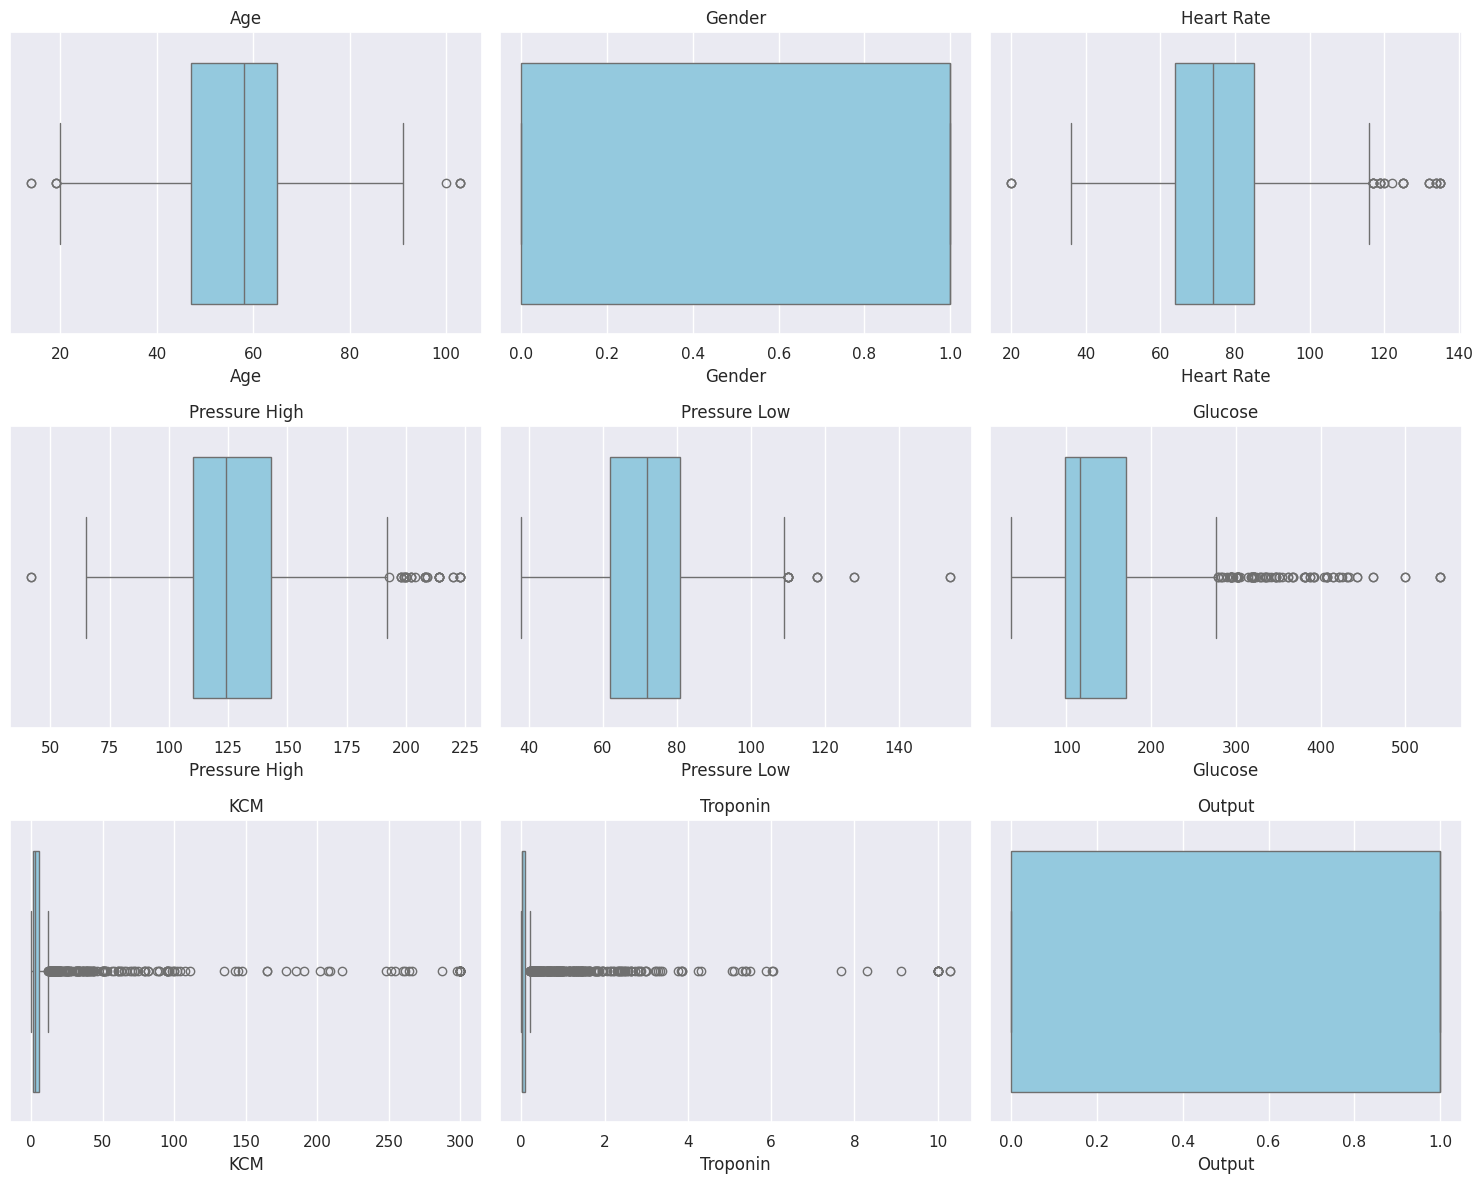

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = df.columns.tolist()
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


In [135]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Create a copy to avoid modifying original data
df_capped = df.copy()

# Cap outliers for each numeric column
for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values - anything below lower_bound becomes lower_bound,
    # anything above upper_bound becomes upper_bound
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

    # Optional: Print what happened
    outliers_low = (df[col] < lower_bound).sum()
    outliers_high = (df[col] > upper_bound).sum()
    print(f"{col}: {outliers_low} low outliers capped, {outliers_high} high outliers capped")

# Check the results
print(f"\nOriginal shape: {df.shape}")
print(f"After capping: {df_capped.shape}")  # Same shape, no rows lost!

Age: 5 low outliers capped, 4 high outliers capped
Gender: 0 low outliers capped, 0 high outliers capped
Heart Rate: 3 low outliers capped, 26 high outliers capped
Pressure High: 2 low outliers capped, 32 high outliers capped
Pressure Low: 0 low outliers capped, 13 high outliers capped
Glucose: 0 low outliers capped, 91 high outliers capped
KCM: 0 low outliers capped, 206 high outliers capped
Troponin: 0 low outliers capped, 258 high outliers capped
Output: 0 low outliers capped, 0 high outliers capped

Original shape: (1321, 9)
After capping: (1321, 9)


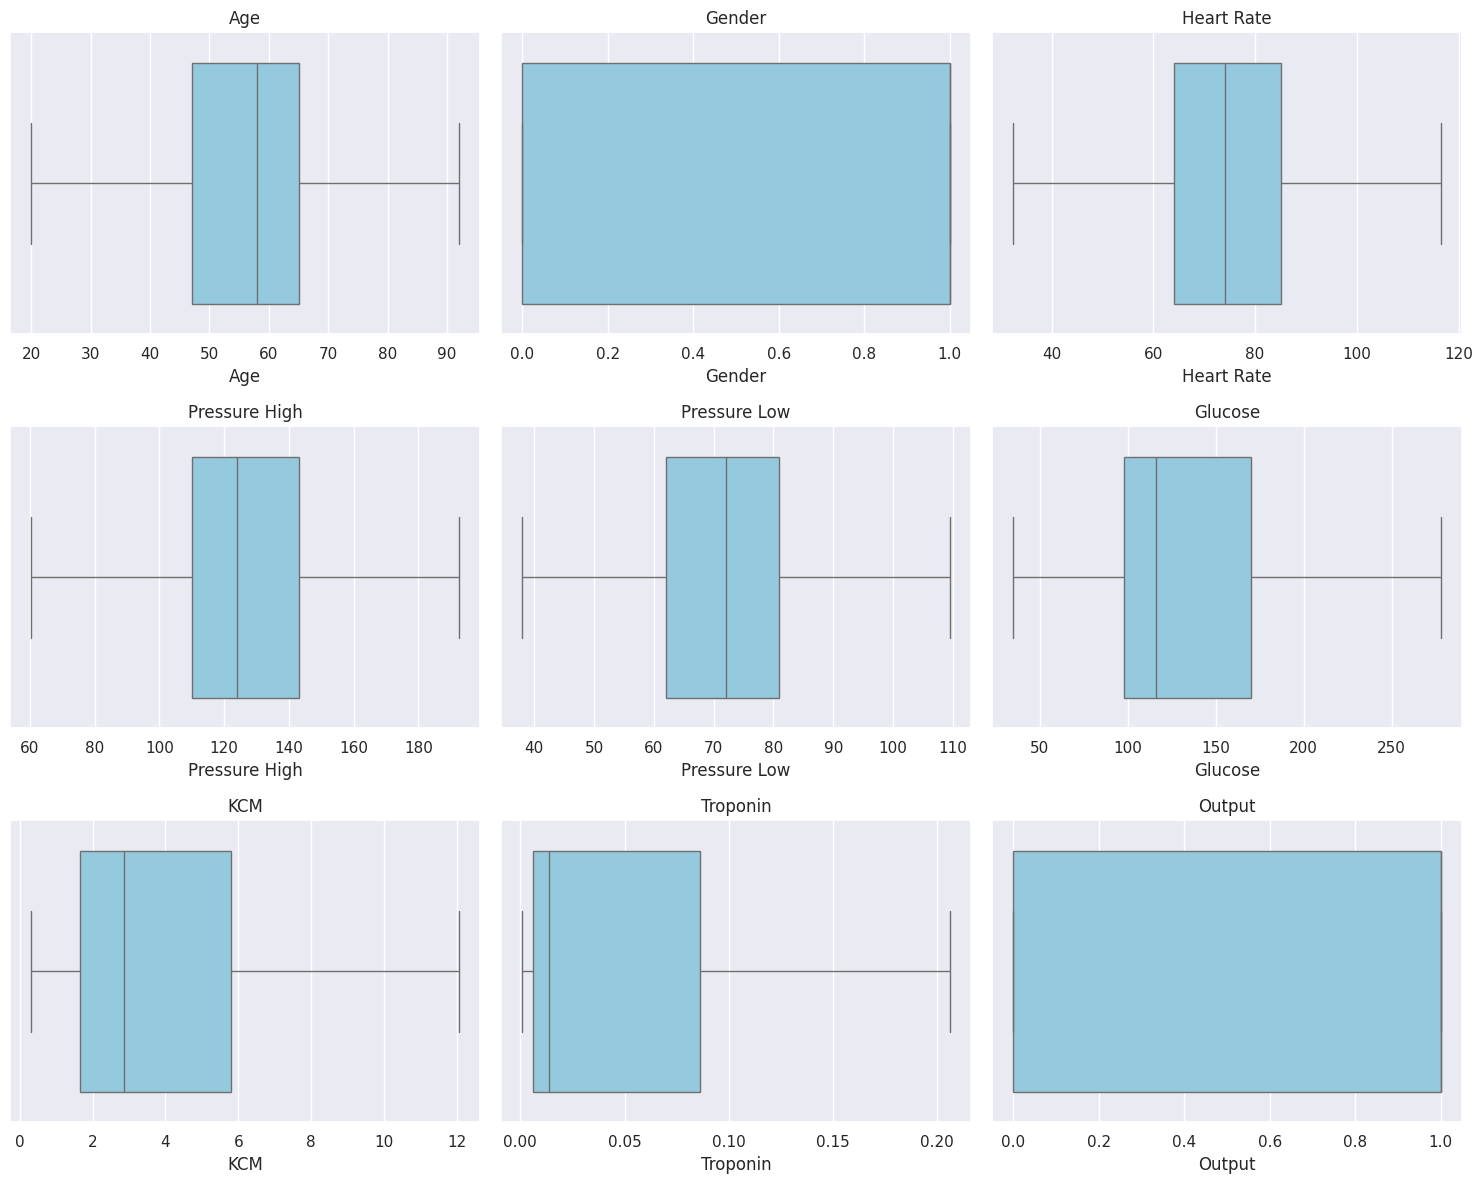

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = df_capped.columns.tolist()
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_capped[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


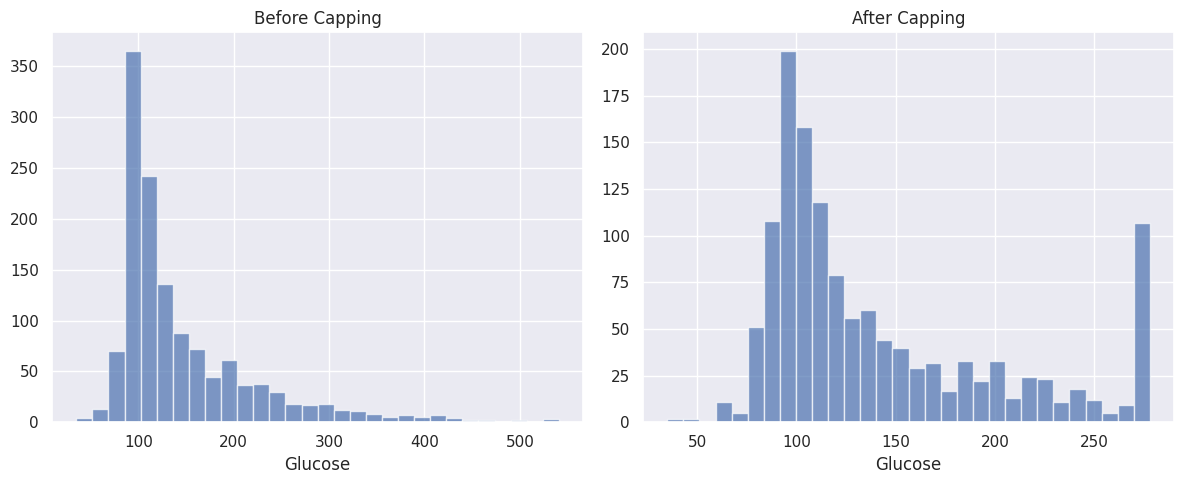

In [137]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before
df['Glucose'].hist(bins=30, ax=axes[0], alpha=0.7)
axes[0].set_title('Before Capping')
axes[0].set_xlabel('Glucose')

# After
df_capped['Glucose'].hist(bins=30, ax=axes[1], alpha=0.7)
axes[1].set_title('After Capping')
axes[1].set_xlabel('Glucose')

plt.tight_layout()
plt.show()

In [138]:
df_capped.describe()

,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,56.175625,0.659349,75.796745,126.828160,72.188115,141.358592,4.469167,0.058859,0.613929
std,13.621598,0.474108,14.784607,25.142495,13.791178,59.609974,3.836334,0.079007,0.487032
min,20.000000,0.000000,32.500000,60.500000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.650000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.810000,0.086000,1.000000
max,92.000000,1.000000,116.500000,192.500000,109.500000,278.000000,12.050000,0.206000,1.000000


In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ["Age", "Heart Rate", "Pressure High", "Pressure Low", "Glucose", "KCM", "Troponin"]
df_capped[scale_cols] = scaler.fit_transform(df_capped[scale_cols])


In [140]:
df.head(5)

,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,0.0
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,1.0
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,0.0
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,1.0
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,0.0


In [141]:
X = df_capped[["Age","Gender","Heart Rate","Pressure High","Pressure Low","Glucose","KCM","Troponin"]]
y = df_capped["Output"]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9735849056603774
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       116
         1.0       0.99      0.97      0.98       149

    accuracy                           0.97       265
   macro avg       0.97      0.97      0.97       265
weighted avg       0.97      0.97      0.97       265



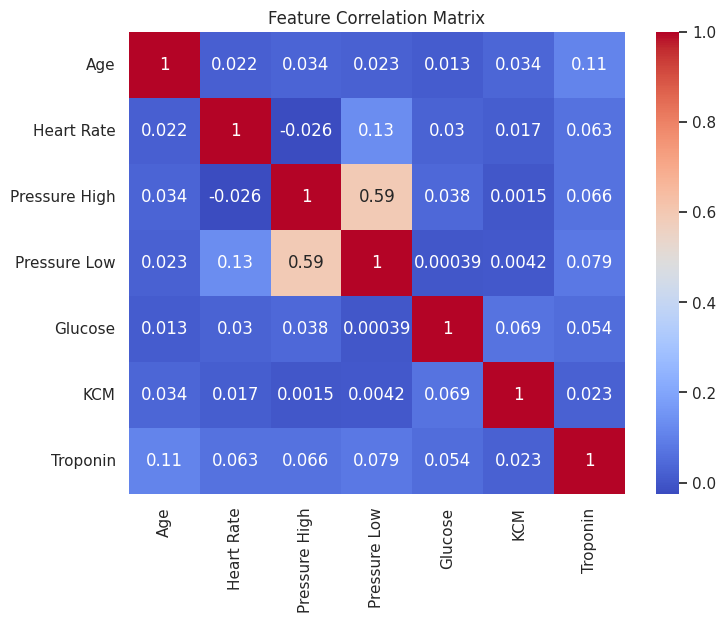

In [144]:
corr = df[["Age","Heart Rate","Pressure High","Pressure Low","Glucose","KCM","Troponin"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [145]:
from sklearn.decomposition import PCA

In [146]:
X_bp = df_capped[["Pressure High", "Pressure Low"]]


# PCA with 2 components
pca = PCA(n_components=2)
bp_pca = pca.fit_transform(X_bp)

# Add back to DataFrame
df_capped["BP_PC1"] = bp_pca[:,0]  # main combined BP signal
df_capped["BP_PC2"] = bp_pca[:,1]

In [147]:
print(X)

           Age  Gender  Heart Rate  Pressure High  Pressure Low   Glucose  \
0     0.611111     1.0    0.398810       0.753788      0.629371  0.514403   
1     0.013889     1.0    0.732143       0.284091      0.111888  1.000000   
2     0.486111     1.0    0.375000       0.753788      0.545455  0.967078   
3     0.611111     1.0    0.446429       0.450758      0.237762  0.967078   
4     0.486111     1.0    0.375000       0.390152      0.377622  1.000000   
...        ...     ...         ...            ...           ...       ...   
1316  0.347222     1.0    0.625000       0.814394      0.923077  0.251029   
1317  0.472222     1.0    0.303571       0.428030      0.419580  1.000000   
1318  0.430556     1.0    0.732143       0.731061      0.573427  0.407407   
1321  1.000000     1.0    1.000000       1.000000      1.000000  1.000000   
1322  0.000000     0.0    0.000000       0.000000      0.000000  0.000000   

           KCM  Troponin  
0     0.126098  0.053659  
1     0.548129  1.000

In [148]:
df_capped.drop(["Pressure High", "Pressure Low"], axis=1, inplace=True)

In [149]:
print(df_capped.columns)

Index(['Age', 'Gender', 'Heart Rate', 'Glucose', 'KCM', 'Troponin', 'Output',
       'BP_PC1', 'BP_PC2'],
      dtype='object')


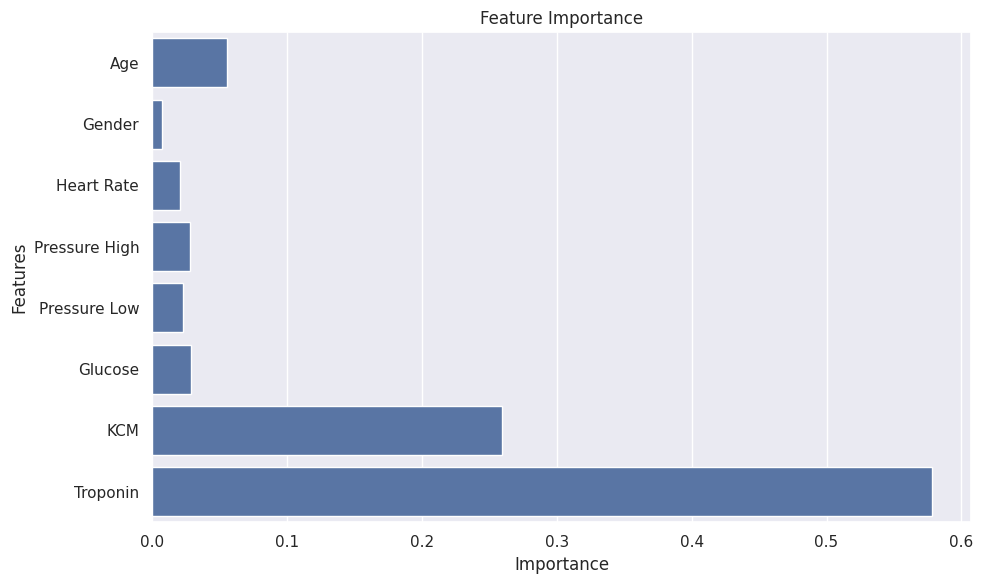

In [150]:
# Retrain the model with the updated X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Now plot the feature importances with the updated model and X
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [151]:
X = df_capped.drop("Gender", axis=1)


In [152]:
X = df.drop("Output", axis=1)


In [153]:
print(X.columns)

Index(['Age', 'Gender', 'Heart Rate', 'Pressure High', 'Pressure Low',
       'Glucose', 'KCM', 'Troponin'],
      dtype='object')


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9735849056603774
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       116
         1.0       0.99      0.97      0.98       149

    accuracy                           0.97       265
   macro avg       0.97      0.97      0.97       265
weighted avg       0.97      0.97      0.97       265



In [155]:
from sklearn.metrics import roc_auc_score
y_proba = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_proba)

np.float64(0.9894121731080768)

In [156]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
print(scores.mean(), scores.std())

0.9965284182293684 0.006492254716417587


In [157]:
df_capped.to_csv("final_dataset.csv", index=False)

In [123]:
from google.colab import files

files.download("final_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>